# Seaborn-FacetGrid

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 展示time=Lunch和time=Dinner的两种情况

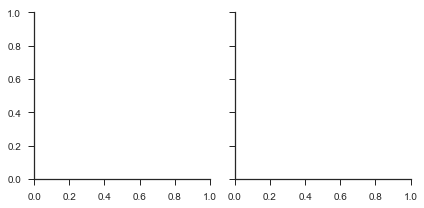

In [3]:
g = sns.FacetGrid(tips, col="time")  #先占上位置，一会再画图

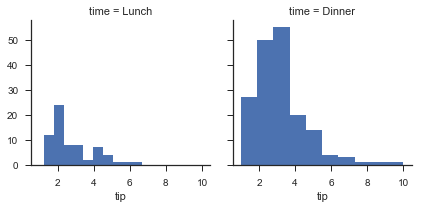

In [4]:
g = sns.FacetGrid(tips, col="time")  #先实例化
g.map(plt.hist, "tip")  #在map函数中指定要画的东西

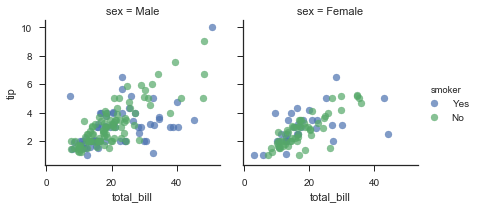

In [5]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()

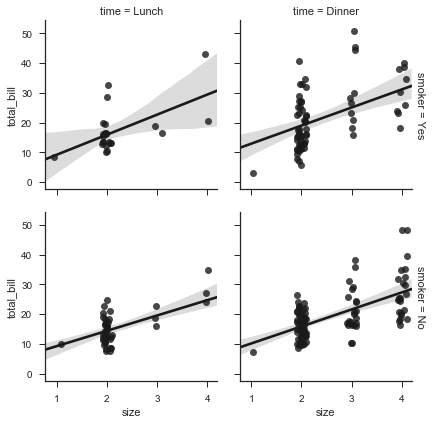

In [6]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".1", fit_reg=True, x_jitter=.1);
#指定颜色的时候当color=.1时较深色，color=.8时较浅
#fit_reg指定为False的时候则不画回归线

E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


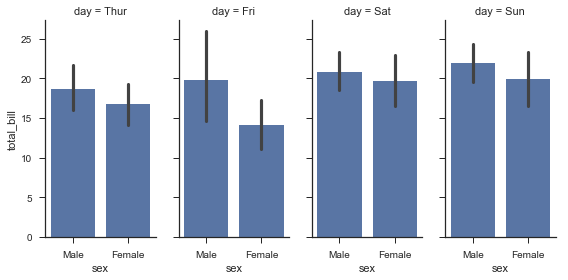

In [7]:
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
#size设置大小，aspect设置长宽比
g.map(sns.barplot, "sex", "total_bill");

### FacetGrid中最好传入pandas的数据

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


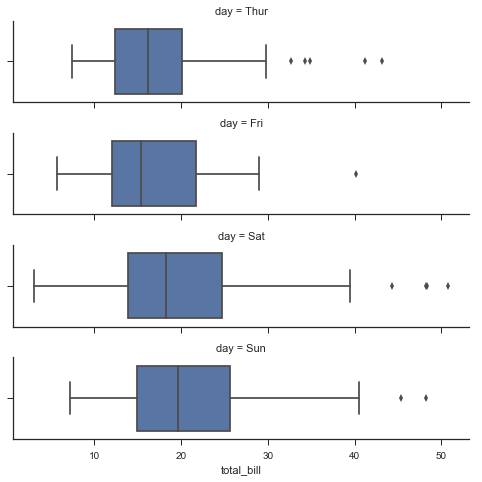

In [8]:
from pandas import Categorical
ordered_days = tips.day.value_counts().index
print (ordered_days)
ordered_days = Categorical(['Thur', 'Fri', 'Sat', 'Sun'])  
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,  # row_orde指定画图的显示顺序，不指定的话会按照默认顺序
                  size=1.7, aspect=4,)
g.map(sns.boxplot, "total_bill")

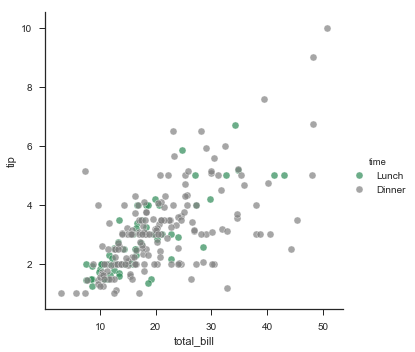

In [9]:
pal = dict(Lunch="seagreen", Dinner="gray")  #调色板传入字典，分别对Lunch和Dinner指定颜色
g = sns.FacetGrid(tips, hue="time", palette=pal, size=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white") #s调整散点的大小
g.add_legend()

### sns.FacetGrid下的hue_kws={"marker":}指定形状

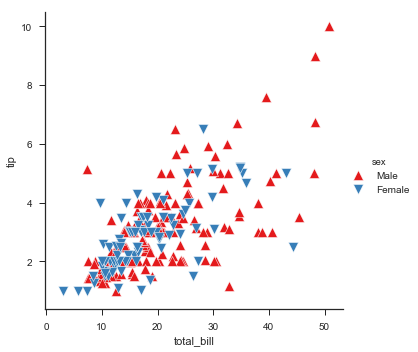

In [10]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend()

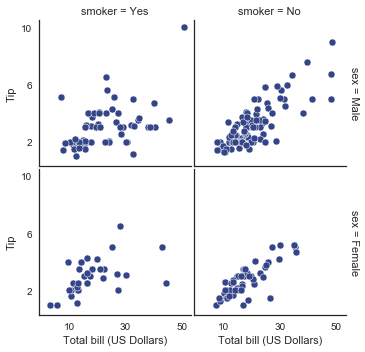

In [14]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=0.5) 
#结合edgecolor="white"，lw是控制散点边缘的白色区域宽度
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]); #设置轴的取值范围
g.fig.subplots_adjust(wspace=.02, hspace=.02);
#也可以改变子图之间的位置关系和整体的偏移程度，如下
#g.fig.subplots_adjust(left  = 0.125,right = 0.5,bottom = 0.1,top = 0.9, wspace=.02, hspace=.02)

### 对鸢尾花数据集，画出变量之间的关系

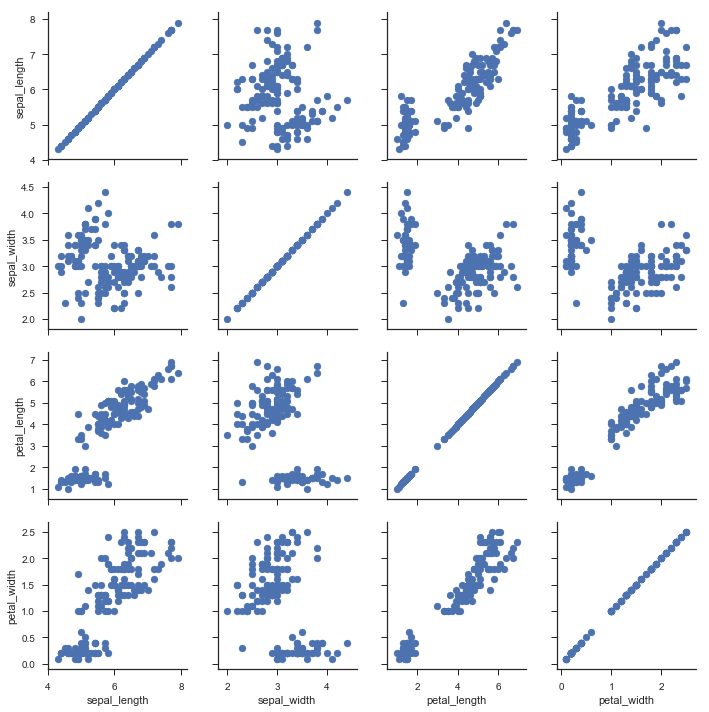

In [15]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);

### 设置对角线上画直方图，非对角线上画散点图
* g.map_diag()
* g.map_offdiag()

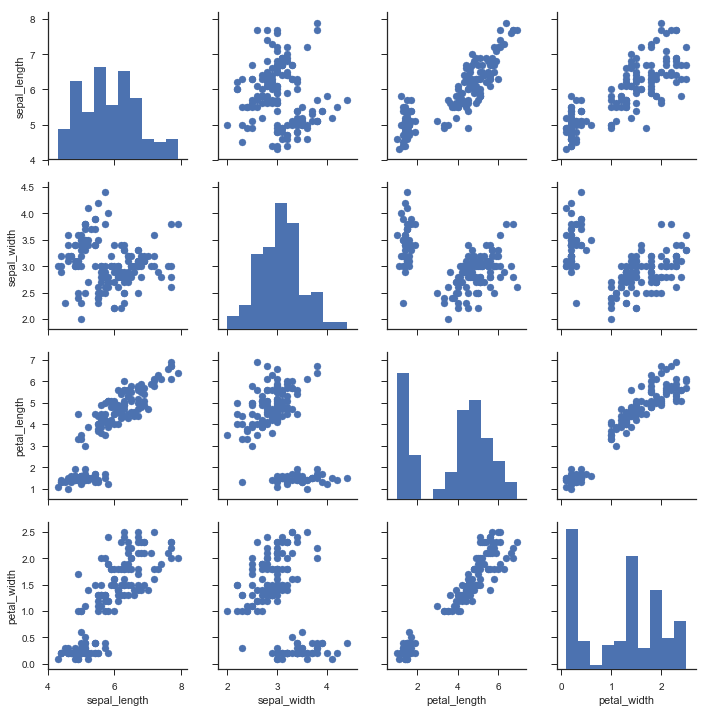

In [16]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### 对鸢尾花的物种进行一个区分表示

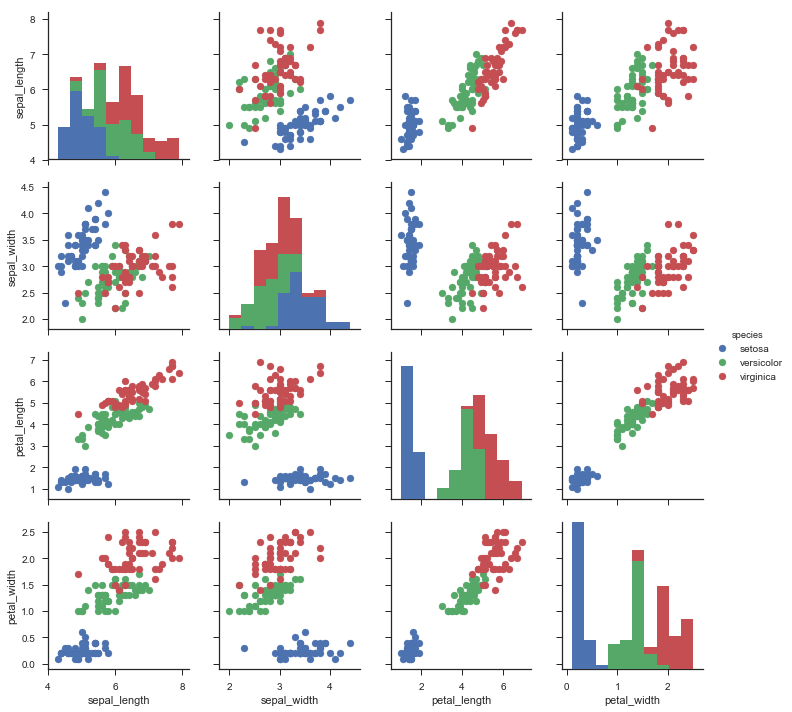

In [17]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

### 只取特征中的一部分可以用vars来指定

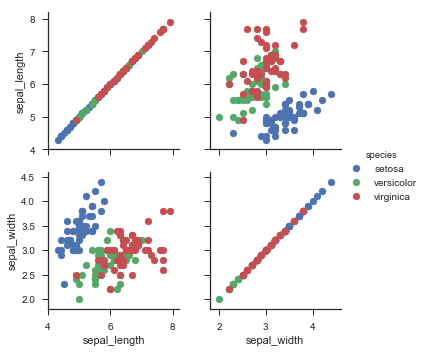

In [18]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter)
g.add_legend()

### 用调色板指定一个渐变色进行画图

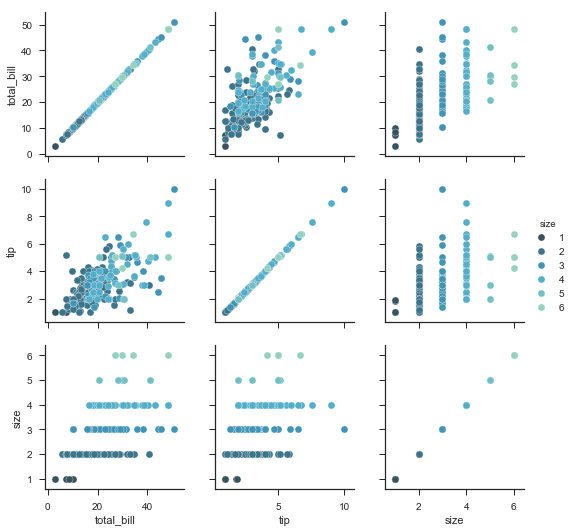

In [23]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()